# TensorFlow NN
- Sequential
- Functional
- Flow: Make the model, Complie, Fit, Predict, Evaluate, Visualization of loss and acc

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [7]:
X,y = make_circles(1000,noise=0.03)

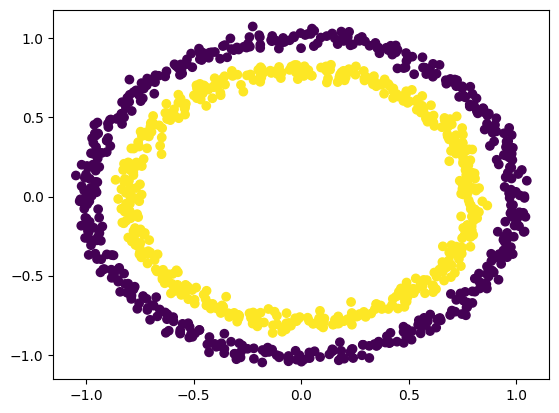

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [19]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X,y,train_size=0.8)
print(x_train.shape,x_test.shape)

(800, 2) (200, 2)


In [10]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [6]:
# y_train = tf.one_hot(y_train,depth=2)
# y_test = tf.one_hot(y_test,depth=2)
# print(y_train.shape,y_test.shape)

In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


print(model.summary())


# model = keras.Sequential()
# model.add(keras.Input(shape=(2,)))
# model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dense(20,activation='relu'))
# model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dense(1,activation='sigmoid'))
# print(model.summary())

model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5005 - loss: 0.6930 - val_accuracy: 0.5150 - val_loss: 0.6876
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5143 - loss: 0.6892 - val_accuracy: 0.5050 - val_loss: 0.6871
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5143 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6866
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5158 - loss: 0.6913 - val_accuracy: 0.5250 - val_loss: 0.6860
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5176 - loss: 0.6913 - val_accuracy: 0.5450 - val_loss: 0.6854
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5455 - loss: 0.6871 - val_accuracy: 0.5450 - val_loss: 0.6848
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5177 - loss: 0.6884 - val_accuracy: 0.5250 - val_loss: 0.6842
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5469 - loss: 0.6827 - val_accuracy: 0.

In [13]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.3255 


[0.322152704000473, 1.0]

In [14]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [15]:
ypred

array([[0.55102515],
       [0.6535853 ],
       [0.65409005],
       [0.34695753],
       [0.66730976],
       [0.29575112],
       [0.5621433 ],
       [0.654829  ],
       [0.79705685],
       [0.8819931 ],
       [0.2539869 ],
       [0.45979404],
       [0.23930061],
       [0.69165015],
       [0.20326856],
       [0.26787567],
       [0.7877165 ],
       [0.10752913],
       [0.73597616],
       [0.2685696 ],
       [0.8572983 ],
       [0.15797138],
       [0.28022322],
       [0.23471567],
       [0.24386911],
       [0.18815199],
       [0.30463985],
       [0.7438229 ],
       [0.3658489 ],
       [0.23361608],
       [0.38074717],
       [0.604264  ],
       [0.70720506],
       [0.88132167],
       [0.8272271 ],
       [0.2506676 ],
       [0.26843965],
       [0.77960515],
       [0.66330624],
       [0.75894356],
       [0.81223667],
       [0.25498816],
       [0.72818965],
       [0.3109352 ],
       [0.13866127],
       [0.30095834],
       [0.20428194],
       [0.585

In [17]:
# np.argmax(ypred,axis = 1)
# ypred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
doing multiclass classification...


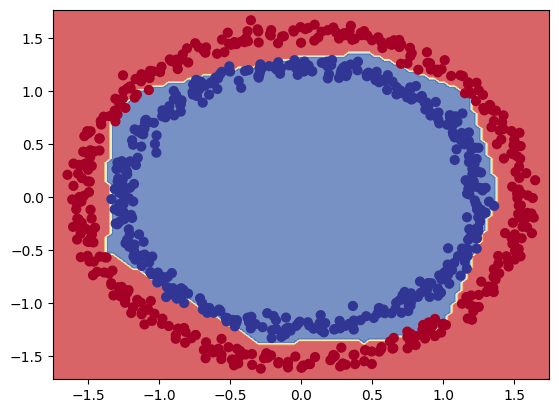

In [27]:
# plot_decision_boundary(model,x_train,np.argmax(y_train,axis=1))
plot_decision_boundary(model,x_train,y_train)

In [22]:
history.history

{'accuracy': [0.4937500059604645,
  0.4975000023841858,
  0.5137500166893005,
  0.5237500071525574,
  0.5274999737739563,
  0.5387499928474426,
  0.5337499976158142,
  0.5287500023841858,
  0.5299999713897705,
  0.5274999737739563,
  0.53125,
  0.5287500023841858,
  0.5299999713897705,
  0.5362499952316284,
  0.5337499976158142,
  0.5350000262260437,
  0.5412499904632568,
  0.5487499833106995,
  0.550000011920929,
  0.5600000023841858,
  0.5612499713897705,
  0.5687500238418579,
  0.5712500214576721,
  0.5912500023841858,
  0.5837500095367432,
  0.5874999761581421,
  0.5837500095367432,
  0.5874999761581421,
  0.6087499856948853,
  0.625,
  0.6312500238418579,
  0.6449999809265137,
  0.6587499976158142,
  0.6800000071525574,
  0.7300000190734863,
  0.7487499713897705,
  0.7674999833106995,
  0.768750011920929,
  0.8087499737739563,
  0.8399999737739563,
  0.856249988079071,
  0.8762500286102295,
  0.9012500047683716,
  0.9012500047683716,
  0.8974999785423279,
  0.8887500166893005,
  0

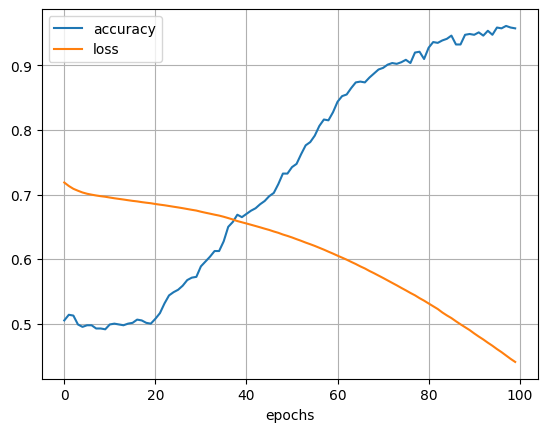

In [26]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['loss'],label = 'loss')

plt.legend()
plt.xlabel('epochs')
plt.grid()
plt.show()

In [24]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.3255 


[0.322152704000473, 1.0]

In [25]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5263 - loss: 0.7106 - val_accuracy: 0.4700 - val_loss: 0.7253
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5107 - loss: 0.7153 - val_accuracy: 0.4700 - val_loss: 0.7185
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5169 - loss: 0.7107 - val_accuracy: 0.4700 - val_loss: 0.7133
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4791 - loss: 0.7100 - val_accuracy: 0.4600 - val_loss: 0.7091
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4822 - loss: 0.7060 - val_accuracy: 0.4650 - val_loss: 0.7061
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4986 - loss: 0.7010 - val_accuracy: 0.4650 - val_loss: 0.7041
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5003 - loss: 0.6984 - val_accuracy: 0.4750 - val_loss: 0.7023
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4821 - loss: 0.7006 - val_accuracy: 0.47

In [28]:
y_train = tf.one_hot(y_train,depth=2)
y_test = tf.one_hot(y_test,depth=2)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)


In [29]:
print(y_test)

tf.Tensor(
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]

In [30]:
model = keras.Sequential()
model.add(keras.Input(shape=(2,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70 (280.00 B)

 Trainable params: 70 (280.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4880 - loss: 0.6905 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5194 - loss: 0.6886 - val_accuracy: 0.4700 - val_loss: 0.6916
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5209 - loss: 0.6886 - val_accuracy: 0.4700 - val_loss: 0.6916
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5316 - loss: 0.6874 - val_accuracy: 0.4850 - val_loss: 0.6915
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5539 - loss: 0.6867 - val_accuracy: 0.4800 - val_loss: 0.6914
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5219 - loss: 0.6886 - val_accuracy: 0.4950 - val_loss: 0.6912
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5187 - loss: 0.6883 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5223 - loss: 0.6869 - val_accuracy: 0.49

In [31]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9166 - loss: 0.5072 


[0.5063778162002563, 0.9049999713897705]

In [32]:
ypred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [34]:
np.argmax(ypred,axis=1)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [35]:
Input = keras.Input(shape=(2,))
x = layers.Dense(10,activation='relu')(Input)
x = layers.Dense(20,activation='relu')(x)
x = layers.Dense(10,activation='relu')(x)
output = layers.Dense(2,activation='softmax')(x)

model = keras.Model(inputs = Input, outputs = output)

print(model.summary())

model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)
history = model.fit(x_train,y_train,batch_size=80,epochs=100,validation_data=(x_test,y_test))

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5245 - loss: 0.7194 - val_accuracy: 0.4950 - val_loss: 0.7185
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5006 - loss: 0.7118 - val_accuracy: 0.4500 - val_loss: 0.7079
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4640 - loss: 0.7041 - val_accuracy: 0.4900 - val_loss: 0.7029
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4434 - loss: 0.7017 - val_accuracy: 0.4450 - val_loss: 0.7001
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4833 - loss: 0.6991 - val_accuracy: 0.4350 - val_loss: 0.6986
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4784 - loss: 0.6964 - val_accuracy: 0.4350 - val_loss: 0.6974
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4522 - loss: 0.6975 - val_accuracy: 0.4600 - val_loss: 0.6964
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5081 - loss: 0.6941 - val_accuracy: 0.45

In [36]:
model.inputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_22>]

In [37]:
model.outputs

[<KerasTensor shape=(None, 2), dtype=float32, sparse=False, ragged=False, name=keras_tensor_26>]

In [38]:
model.layers

[<InputLayer name=input_layer_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>,
 <Dense name=dense_15, built=True>]

In [39]:
model.layers[-2].output

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_25>

In [40]:
# new_model = keras.Model(inputs = model.inputs,
#                         outputs = model.get_layer('dense_6').output)
new_model = keras.Model(inputs = model.inputs,
                        outputs = [model.layers[-2].output,model.layers[-1].output])
print(new_model.summary())

features = new_model.predict(x_test)
# for feat in features:
#     print(feat.shape)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482 (1.88 KB)

 Trainable params: 482 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(32, 2))
  warnings.warn(msg)
C:\Users\abhis\miniconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_22']
Received: inputs=Tensor(shape=(None, 2))
  warnings.warn(msg)


In [42]:
features

[array([[0.92920744, 0.7424843 , 1.0574055 , ..., 0.        , 0.9149722 ,
         0.98762244],
        [1.2495838 , 0.8271142 , 0.19086552, ..., 0.        , 0.7448768 ,
         1.0759023 ],
        [1.0391877 , 0.51181227, 0.75783205, ..., 0.        , 1.3507429 ,
         0.8031573 ],
        ...,
        [0.8731384 , 0.4445428 , 1.1611981 , ..., 0.        , 1.2025694 ,
         0.7325926 ],
        [0.2274271 , 0.10425667, 1.2823665 , ..., 0.        , 1.8761872 ,
         0.20217639],
        [0.        , 0.        , 1.443033  , ..., 0.        , 2.0480516 ,
         0.        ]], dtype=float32),
 array([[3.61208916e-02, 9.63879108e-01],
        [2.16694223e-03, 9.97833073e-01],
        [1.25932157e-01, 8.74067843e-01],
        [9.96736586e-01, 3.26336245e-03],
        [6.10991986e-03, 9.93890047e-01],
        [9.99270141e-01, 7.29900843e-04],
        [7.08782375e-02, 9.29121733e-01],
        [6.06439076e-03, 9.93935645e-01],
        [1.19827106e-03, 9.98801708e-01],
        [3.21200

In [43]:
features[0].shape

(200, 10)

In [44]:
features[1].shape

(200, 2)